# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

print (cities)

Number of cities in the list: 614
['kandiari', 'vilyuysk', 'albany', 'tiksi', 'plavsk', 'glace bay', 'kimovsk', 'adamstown', 'afaahiti', 'ancud', 'oualidia', 'isafjordur', 'yellowknife', 'yichun', 'sao joao da barra', 'olonkinbyen', 'winnemucca', 'agat village', 'baise city', 'vilyuchinsk', 'shakawe', 'port-aux-francais', 'puerto natales', 'bethel', 'wuyang', 'timbuktu', 'dunedin', 'whitehorse', 'timimoun', 'nyeri', 'georgetown', 'kete krachi', 'turiacu', 'edinburgh of the seven seas', 'petropavlovsk-kamchatsky', 'eagle pass', 'melo', 'margaret river', 'kavieng', 'grytviken', 'tagiura', 'new norfolk', 'chonchi', 'malvan', 'tamandare', 'lalibela', 'west island', 'gudari', 'waitangi', 'port alfred', 'coquimbo', 'tura', 'tobi village', 'puerto armuelles', 'simpang', 'ilulissat', 'bor', 'fernie', 'blackmans bay', 'cavan', 'bredasdorp', 'katsuren-haebaru', 'yung shue wan', 'tsiombe', 'vingt cinq', 'thunder bay', 'port mathurin', 'malangali', 'hawaiian paradise park', 'newman', 'mindelo', 'p

---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?units=Metric&APPID=" + weather_api_key

# Build partial query URL
#query_url = f"{url}&units={units}&appid={weather_api_key}&q="

# Define an empty list to fetch the weather data for each city
city_data = []
city_lat = []
city_lng = []
city_max_temp = []
city_humidity = []
city_clouds = []
city_wind = []
city_country = []
city_date = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
    
    # Create endpoint URL with each city
    city_url = url + "&q=" + city
   
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        response = requests.get(city_url).json()
        
        
        city_data.append(response["name"])
        city_lat.append(response["coord"]["lat"])
        city_lng.append(response["coord"]["lon"])
        city_max_temp.append(response["main"]["temp_max"])
        city_humidity.append(response["main"]["humidity"])
        city_clouds.append(response["clouds"]["all"])
        city_wind.append(response["wind"]["speed"])
        city_country.append(response["sys"]["country"])
        city_date.append(response["dt"])
        time.sleep(2)
       
    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | kandiari
Processing Record 2 of Set 1 | vilyuysk
Processing Record 3 of Set 1 | albany
Processing Record 4 of Set 1 | tiksi
Processing Record 5 of Set 1 | plavsk
Processing Record 6 of Set 1 | glace bay
Processing Record 7 of Set 1 | kimovsk
Processing Record 8 of Set 1 | adamstown
Processing Record 9 of Set 1 | afaahiti
Processing Record 10 of Set 1 | ancud
Processing Record 11 of Set 1 | oualidia
City not found. Skipping...
Processing Record 12 of Set 1 | isafjordur
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | yichun
Processing Record 15 of Set 1 | sao joao da barra
Processing Record 16 of Set 1 | olonkinbyen
Processing Record 17 of Set 1 | winnemucca
Processing Record 18 of Set 1 | agat village
Processing Record 19 of Set 1 | baise city
Processing Record 20 of Set 1 | vilyuchinsk
Processing Record 21 of Set 1 | shakawe
Processing Record 22 of Set 1 | port-aux-fra

Processing Record 39 of Set 4 | invercargill
Processing Record 40 of Set 4 | mahibadhoo
Processing Record 41 of Set 4 | cockburn town
Processing Record 42 of Set 4 | ketchikan
Processing Record 43 of Set 4 | satana
Processing Record 44 of Set 4 | ongole
Processing Record 45 of Set 4 | belo sur tsiribihina
Processing Record 46 of Set 4 | taoudenni
Processing Record 47 of Set 4 | poronaysk
Processing Record 48 of Set 4 | sitka
Processing Record 49 of Set 4 | eydhafushi
Processing Record 0 of Set 5 | pavlohrad
Processing Record 1 of Set 5 | sandnessjoen
Processing Record 2 of Set 5 | laguna
Processing Record 3 of Set 5 | atasu
Processing Record 4 of Set 5 | brigantine
Processing Record 5 of Set 5 | port douglas
Processing Record 6 of Set 5 | huarmey
Processing Record 7 of Set 5 | camana
Processing Record 8 of Set 5 | khoyniki
Processing Record 9 of Set 5 | nynashamn
Processing Record 10 of Set 5 | fort bragg
Processing Record 11 of Set 5 | pangody
Processing Record 12 of Set 5 | suva
Proc

City not found. Skipping...
Processing Record 29 of Set 8 | egilsstadir
Processing Record 30 of Set 8 | uturoa
Processing Record 31 of Set 8 | ola
Processing Record 32 of Set 8 | bataipora
Processing Record 33 of Set 8 | gueret
Processing Record 34 of Set 8 | mong cai
City not found. Skipping...
Processing Record 35 of Set 8 | kuching
Processing Record 36 of Set 8 | sinabang
Processing Record 37 of Set 8 | iskateley
Processing Record 38 of Set 8 | xiaoshi
Processing Record 39 of Set 8 | fort mcmurray
Processing Record 40 of Set 8 | sokoni
Processing Record 41 of Set 8 | santana
Processing Record 42 of Set 8 | kokopo
Processing Record 43 of Set 8 | ostersund
Processing Record 44 of Set 8 | wewak
Processing Record 45 of Set 8 | san patricio
Processing Record 46 of Set 8 | funafuti
Processing Record 47 of Set 8 | manokwari
Processing Record 48 of Set 8 | al harithah
Processing Record 49 of Set 8 | howrah
Processing Record 0 of Set 9 | salair
Processing Record 1 of Set 9 | kingscliff
Proce

Processing Record 17 of Set 12 | ilebo
Processing Record 18 of Set 12 | rabigh
Processing Record 19 of Set 12 | quthing
Processing Record 20 of Set 12 | balcarce
Processing Record 21 of Set 12 | black forest
Processing Record 22 of Set 12 | mili
Processing Record 23 of Set 12 | north platte
Processing Record 24 of Set 12 | bakanas
Processing Record 25 of Set 12 | hoopstad
Processing Record 26 of Set 12 | tralee
Processing Record 27 of Set 12 | paita
Processing Record 28 of Set 12 | ixtlahuacan del rio
Processing Record 29 of Set 12 | papantla de olarte
Processing Record 30 of Set 12 | yarmouth
Processing Record 31 of Set 12 | xanthi
Processing Record 32 of Set 12 | veselyy
Processing Record 33 of Set 12 | notodden
Processing Record 34 of Set 12 | maceio
Processing Record 35 of Set 12 | papao
Processing Record 36 of Set 12 | tarauaca
Processing Record 37 of Set 12 | kolondieba
Processing Record 38 of Set 12 | fang
Processing Record 39 of Set 12 | esfarayen
Processing Record 40 of Set 12

In [7]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

city_data_df.count()

City          586
Lat           586
Lng           586
Max Temp      586
Humidity      586
Cloudiness    586
Wind Speed    586
Country       586
Date          586
dtype: int64

In [8]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,kandiari,26.9156,68.5216,34.94,35,2,4.30,PK,1694313093
1,vilyuysk,63.7553,121.6247,2.82,92,100,2.35,RU,1694313093
2,albany,42.6001,-73.9662,22.04,89,100,1.34,US,1694313020
3,tiksi,71.6872,128.8694,3.73,66,28,2.46,RU,1694313038
4,plavsk,53.7094,37.2919,12.65,78,100,3.81,RU,1694313094


In [16]:
# Export the City_Data into a csv
city_data_df.to_csv("cities.csv", index_label="City_ID")

In [17]:
# Read saved data
city_data_df = pd.read_csv("cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kandiari,26.9156,68.5216,34.94,35,2,4.30,PK,1694313093
1,vilyuysk,63.7553,121.6247,2.82,92,100,2.35,RU,1694313093
2,albany,42.6001,-73.9662,22.04,89,100,1.34,US,1694313020
3,tiksi,71.6872,128.8694,3.73,66,28,2.46,RU,1694313038
4,plavsk,53.7094,37.2919,12.65,78,100,3.81,RU,1694313094


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

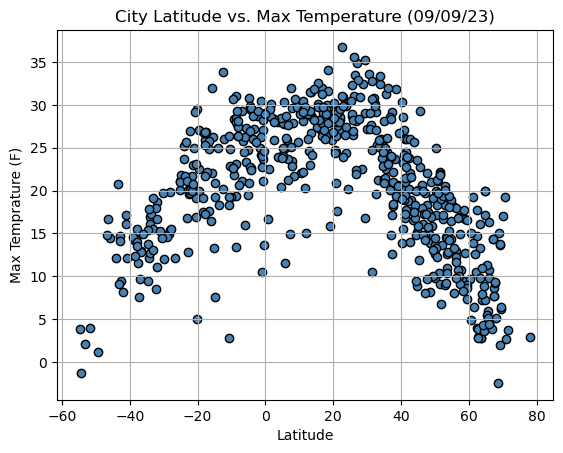

In [22]:
# Build scatter plot for latitude vs. temperature
x_values = city_data_df["Lat"]
y_values = city_data_df["Max Temp"]

# Incorporate the other graph properties
plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")
plt.xlabel('Latitude')
plt.ylabel('Max Temprature (F)')
plt.title("City Latitude vs. Max Temperature (%s)" % time.strftime("%x"))
plt.grid()

# Save the figure
plt.savefig("lat_vs_temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

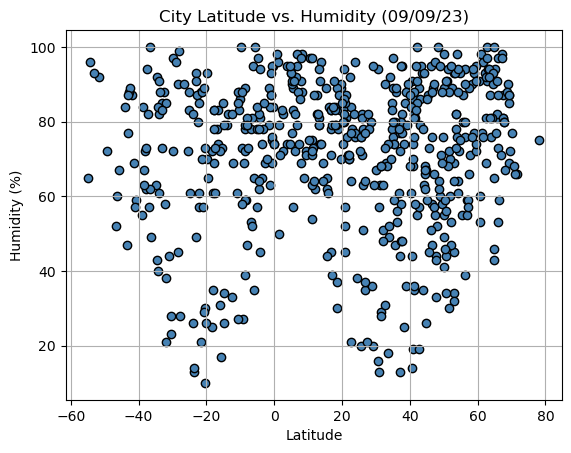

In [25]:
# Build the scatter plots for latitude vs. humidity
x_values = city_data_df["Lat"]
y_values = city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title("City Latitude vs. Humidity (%s)" % time.strftime("%x"))
plt.grid()

# Save the figure
plt.savefig("lat_vs_humid.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

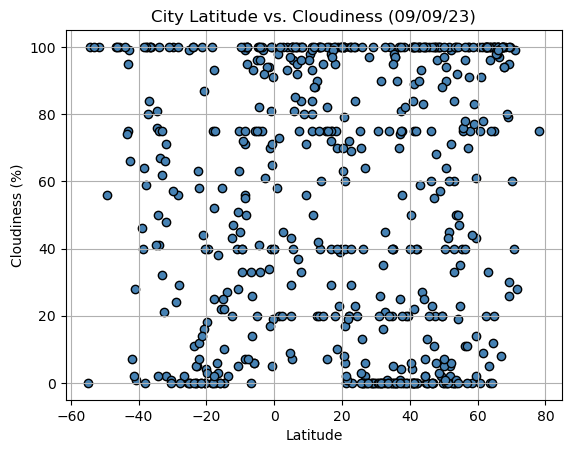

In [27]:
# Build the scatter plots for latitude vs. cloudiness
x_values = city_data_df["Lat"]
y_values = city_data_df["Cloudiness"]


# Incorporate the other graph properties
plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title("City Latitude vs. Cloudiness (%s)" % time.strftime("%x"))
plt.grid()

# Save the figure
plt.savefig("lat_vs_cloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

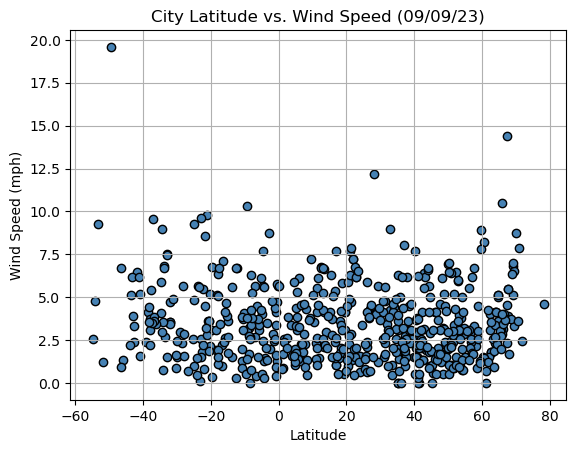

In [28]:
# Build the scatter plots for latitude vs. wind speed
x_values = city_data_df["Lat"]
y_values = city_data_df["Wind Speed"]

# Incorporate the other graph properties
plt.scatter(x_values,y_values, marker = "o", facecolor = "steelblue", edgecolor="black")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title("City Latitude vs. Wind Speed (%s)" % time.strftime("%x"))
plt.grid()

# Save the figure
plt.savefig("lat_vs_wind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots


In [31]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
north_hemisphere = city_data_df.loc[city_data_df["Lat"] >= 0]

# Display sample data
north_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,kandiari,26.9156,68.5216,34.94,35,2,4.30,PK,1694313093
1,vilyuysk,63.7553,121.6247,2.82,92,100,2.35,RU,1694313093
2,albany,42.6001,-73.9662,22.04,89,100,1.34,US,1694313020
3,tiksi,71.6872,128.8694,3.73,66,28,2.46,RU,1694313038
4,plavsk,53.7094,37.2919,12.65,78,100,3.81,RU,1694313094


In [33]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
south_hemisphere = city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
south_hemisphere.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
7,adamstown,-25.0660,-130.1015,21.17,88,99,4.82,PN,1694313044
8,afaahiti,-17.7500,-149.2833,25.93,83,25,6.36,PF,1694313095
9,ancud,-41.8697,-73.8203,8.21,87,7,6.45,CL,1694313095
13,sao joao da barra,-21.6403,-41.0511,21.67,88,0,8.56,BR,1694313097
19,shakawe,-18.3667,21.8500,17.49,25,0,1.92,BW,1694313100


###  Temperature vs. Latitude Linear Regression Plot

The p-value is: 3.833778440069487e-80
The r-value is: -0.7672550001661095


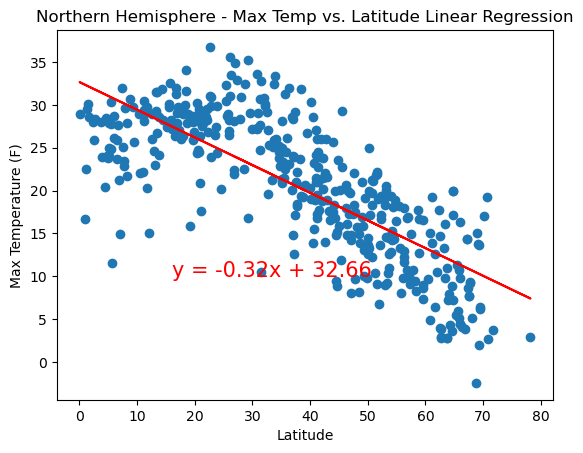

In [35]:
# Linear regression on Northern Hemisphere
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(16,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("north_temp_lg.png")
plt.show() 

The p-value is: 1.8921223469459693e-29
The r-value is: 0.7161466414135785


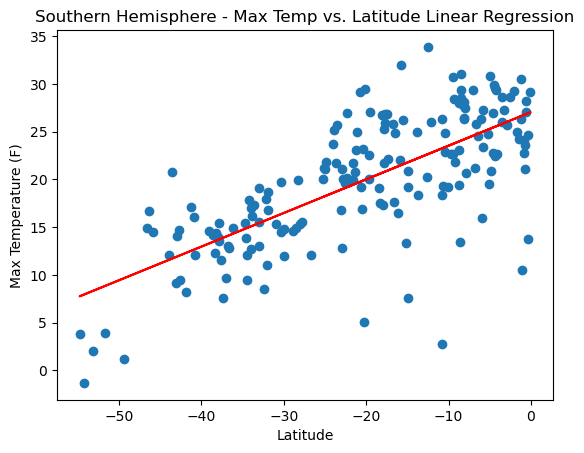

In [36]:
# Linear regression on Southern Hemisphere
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')

print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")
plt.savefig("south_temp_lg.png")
plt.show()


**Discussion about the linear relationship:** 
----Comparing the linear regression of temperatures at changing latitudes in the northern vs southern hemisphere:
------1) The linear regression is modeling what happens to temperature as latitudes increase in the northern and southern hemispheres. 
------2) In addition, this means that for the northern hemisphere as latitude increases you move further away from the equator. ------3) On the other hand, in the southern hemisphere latitudes decrease as we move away from the equator. For the northern hemisphere there is a significant negative correlation between latitude and maximum temperature. 
------4) Whereas, in the southern hemisphere there is a positive correlation between latitude and maximum temperature.

### Humidity vs. Latitude Linear Regression Plot

The p-value is: 0.9418104509910177
The r-value is: -0.0036293562674243264


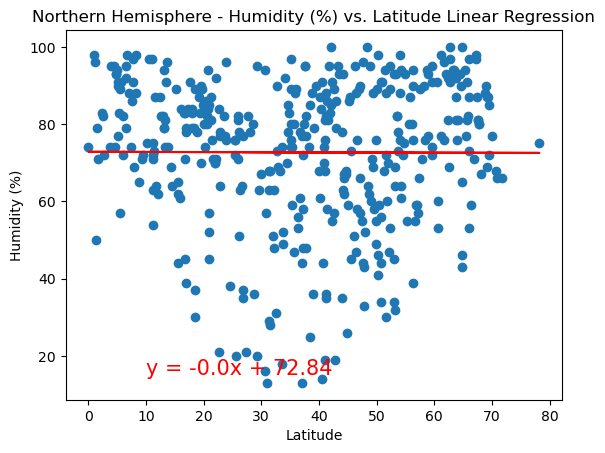

In [37]:
# Northern Hemisphere
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,15),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("north_humidity_lg.png")
plt.show() 

The p-value is: 0.5636241500930791
The r-value is: 0.04344588114188821


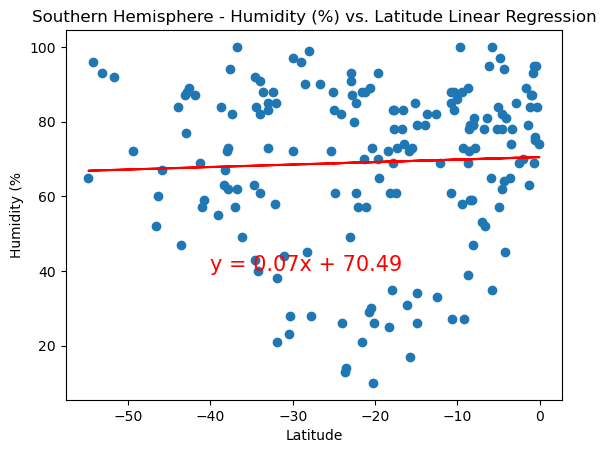

In [38]:
# Southern Hemisphere
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,40),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')

print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("south_humidity_lg.png")
plt.show()

**Discussion about the linear relationship:** 
Comparing the linear regression of humidity at changing latitudes in the northern vs southern hemisphere:

1) The linear regression is modeling what happens to humidity as latitude increases in the northern and southern hemispheres.
2) As latitude increases for the northern hemisphere we move further away from the equator, and as latitude increases for the    southern hemisphere we move closer to the equator.
3) It doesnt matter if latitude increases in the northern hemisphere it also increases humidity, which means there is a Negative correlation. There is a significant correlation between latitudes and humidity in the southern hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The p-value is: 0.8161150193850283
The r-value is: -0.011561984626468314


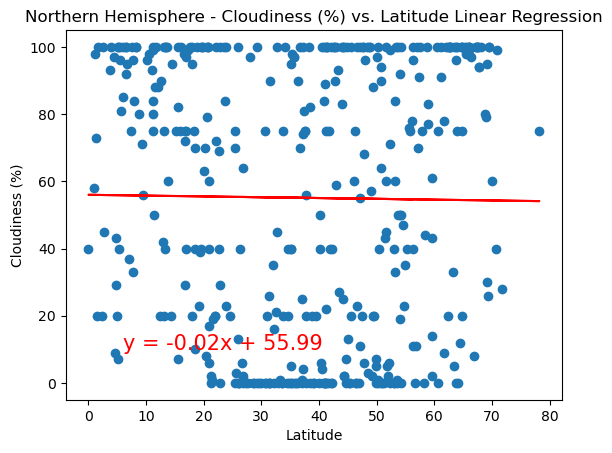

In [39]:
# Northern Hemisphere
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')

print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("north_cloud_lg.png")
plt.show() 

The p-value is: 0.5292291714533035
The r-value is: -0.047332588552856304


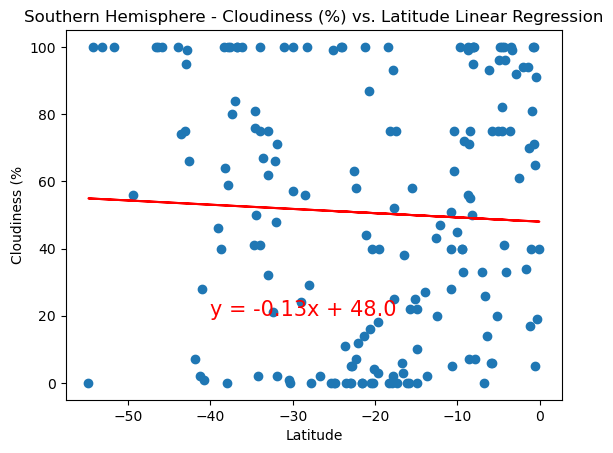

In [40]:
# Southern Hemisphere
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Cloudiness']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("south_cloud_lg.png")
plt.show()

**Discussion about the linear relationship:** 

Comparing the linear regression of cloudiness at changing latitudes in the northern vs southern hemisphere:
1) The linear regression is modeling what happens to cloudiness as latitudes increase in the northern and southern hemispheres. 2) As latitude increases for the northern hemisphere we move further away from the equator, and as latitude increases for the southern hemisphere we move closer to the equator.
3) For the northern hemisphere, increases in latitude appear to be weakly related to increases in cloudiness, Also there is significant negative relationship/correlation. 
4) On the other hand, there is no relationship between latitude and cloudiness in the southern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The p-value is: 0.23018907481026507
The r-value is: 0.05960587580191195


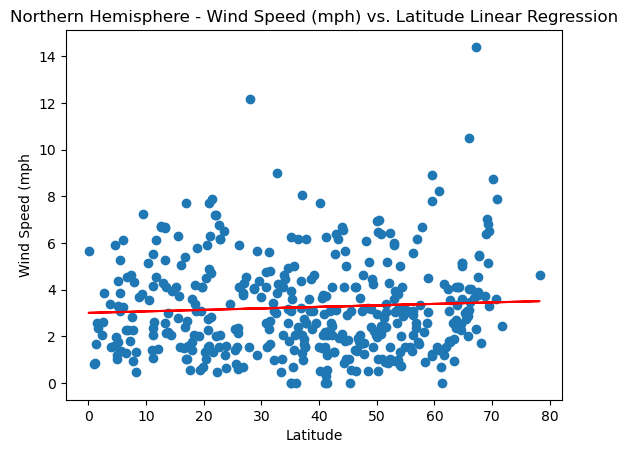

In [43]:
# Northern Hemisphere
x_values = pd.to_numeric(north_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(north_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(30,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("north_wind_lg.png")
plt.show() 

The p-value is: 0.014122048852481426
The r-value is: -0.18316002225159


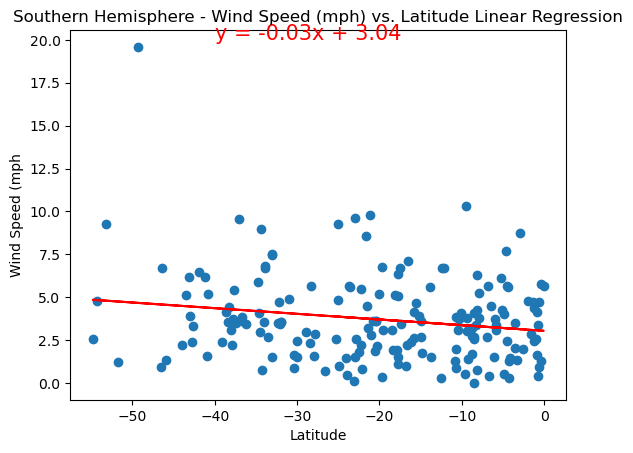

In [42]:
# Southern Hemisphere
x_values = pd.to_numeric(south_hemisphere['Lat']).astype(float)
y_values = pd.to_numeric(south_hemisphere['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,20),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')

print(f"The p-value is: {pvalue}")
print(f"The r-value is: {rvalue}")

plt.savefig("south_wind_lg.png")
plt.show() 

**Discussion about the linear relationship:** 
Comparing the linear regression of wind speed at changing latitudes in the northern vs southern hemisphere:

1) The linear regression is modeling what happens to wind speed as latitudes increase in the northern and southern hemispheres. 2) As latitude increases for the northern hemisphere we move further away from the equator, and as latitude increases for the southern hemisphere we move closer to the equator. 
3) In the northern hemisphere, although the relationship between increasing latitude and wind speed is significant (based on the p-value), there only appears to be a weak correlation.
4) On the other hand, in the southern hemisphere there is no correlation between the increasing latitude and wind speed.